# Examen Módulo 1 - Ecuaciones diferenciales. <font color =blue> Tipo de examen 1.  </font>

Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:

- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería Examen1_LopezMichel.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

# Las cosas del amor.

Consideramos un modelo simple de la dinámica del amor/odio en una pareja, propuesto por Strogatz en 1988.

- Strogatz, S.H. (1988) *Love affairs and differential equations*, Math. Magazine 61, 35.

### Primer punto (50 puntos).

Romeo está enamorado de Julieta, pero en este caso, Julieta tiene sentimientos volubles. Mientras Romeo más la ama, ella quiere huir de él. Pero cuando Romeo no muestra atención, Julieta lo empieza a ver muy atractivo.

Del otro lado, Romeo tiene sentimientos imitativos. Esto quiere decir que se pone cariñoso cuando ella lo ama y se vuelve frío cuando ella lo odia.

Sean:

- $x_1(t)$ : amor/odio de Romeo hacia Julieta en el tiempo  $t$ .
- $x_2(t)$ : amor/odio de Julieta hacia Romeo en el tiempo  $t$ .

Consideraremos que un valor positivo de  $x_1$  o  $x_2$  corresponde a amor, y que un valor negativo corresponde a odio.

Un modelo del romance anteriormente descrito es
$$ \frac{dx_1}{dt}=ax_2,$$
$$ \frac{dx_2}{dt}=−bx_1$$
 
con  $a$  y  $b$  constantes positivas. Definimos  $x=[x_1,x_2]^T$.

1. (20 puntos) Simular este sistema eligiendo los parámetros  $a=b=1$  y condiciones iniciales  $x(0)=[x1(0),x2(0)]^T=[5,5]^T$, usando un vector de tiempo de $0$ a $50$ (unidades de tiempo).
2. (15 puntos)
    - (10 puntos) Graficar las soluciones en el tiempo, es decir,  $x_1$  vs. $t$  y  $x_2$ vs  $t$.  
    - (5 puntos) ¿Qué forma tienen dichas soluciones? ¿Qué se puede decir del amor/odio de Romeo hacia Julieta? ¿Qué se puede decir del amor/odio de Julieta hacia Romeo?
3. (15 puntos)
    - (10 puntos) Graficar el retrato de fase, es decir,  $x_2$  vs  $x_1$.
    - (5 puntos) ¿Cómo es el amor de Romeo y Julieta? ¿Considera usted sano este tipo de amor?

In [1]:
#solución simbólica de romeo a julieta
import sympy as sym
from sympy import init_printing; init_printing(use_latex='mathjax')
from IPython.display import display
t, a = sym.symbols('t a')
x1 = sym.Function('x1')
x2 = sym.Function('x2')
eqn = sym.Eq(sym.Derivative(x1(t),t) - a*x2(t), 0)
display(eqn)
sym.dsolve(eqn, x1(t))

           d            
-a⋅x₂(t) + ──(x₁(t)) = 0
           dt           

               ⌠         
x₁(t) = C₁ + a⋅⎮ x₂(t) dt
               ⌡         

despejar ambas ecuaciones para igualarlas a 0. Igualar ecuaciones, dejar de un lado x1 y del otro x2. Separarlas igualándolas a 0
$$ \frac{dx_1}{dt} - ax_2 = 0 ,\frac{dx_2}{dt} + bx_1 =0$$

$$ \frac{dx_1}{dt} - ax_2 = \frac{dx_2}{dt} + bx_1,$$

$$ \frac{dx_1}{dt}-bx_1 = \frac{dx_2}{dt}=+ax_2$$ 

$$ \frac{dx_1}{dt}=bx_1$$
$$ \frac{dx_2}{dt}=−ax_2$$

In [2]:
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#solución numérica de romeo a julieta
b=1
def romeo(x1, t, b):
    return b * x1
# Vector de periodos
tt = np.linspace(0,50)
CC = odeint(romeo, 5, tt, args = (b,))

#solución numérica de julieta a romeo
a=1
def julieta(x2, t, a):
    return -a * x2
# Vector de periodos
tt = np.linspace(0,50)
CC2 = odeint(julieta, 5, tt, args = (a,))

for i in range(0,50):
    x=[]
    x.append(CC[i])
    x.append(CC2[i])
    array=np.array(x)
    print (array)
#print (np.transpose(x))


[[ 5.]
 [ 5.]]
[[ 13.8716349 ]
 [  1.80223904]]
[[ 38.48445037]
 [  0.64961303]]
[[ 106.76844774]
 [   0.23415155]]
[[  2.96210583e+02]
 [  8.43994108e-02]]
[[  8.21785007e+02]
 [  3.04215835e-02]]
[[  2.27990030e+03]
 [  1.09653938e-02]]
[[  6.32518888e+03]
 [  3.95245242e-03]]
[[  1.75481420e+04]
 [  1.42465331e-03]]
[[  4.86842836e+04]
 [  5.13512012e-04]]
[[  1.35066121e+05]
 [  1.85093986e-04]]
[[  3.74717580e+05]
 [  6.67178423e-05]]
[[  1.03958909e+06]
 [  2.40495211e-05]]
[[  2.88416003e+06]
 [  8.66819620e-06]]
[[  8.00160293e+06]
 [  3.12443085e-06]]
[[  2.21990627e+07]
 [  1.12486476e-06]]
[[  6.15874582e+07]
 [  4.06297099e-07]]
[[  1.70863746e+08]
 [  1.47806647e-07]]
[[  4.74031897e+08]
 [  5.21657575e-08]]
[[  1.31511947e+09]
 [  1.83641781e-08]]
[[  3.64857141e+09]
 [  7.02585022e-09]]
[[  1.01223300e+10]
 [  2.62567884e-09]]
[[  2.80826531e+10]
 [  9.75121162e-10]]
[[  7.79104618e+10]
 [  2.12976561e-10]]
[[  2.16149095e+11]
 [ -3.28481640e-10]]
[[  5.99668261e+11]
 [ 

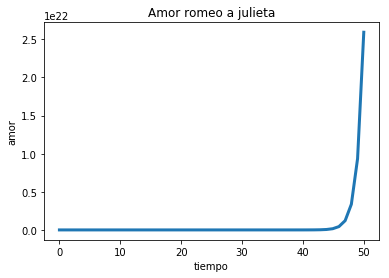

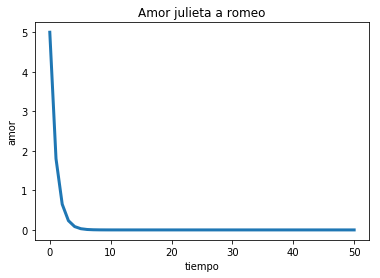

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

# romeo a julieta
def romeo(C, t, b):
    return b * C
    # Vector de periodos
tt = np.linspace(0,50)
CC = odeint(romeo, 5, tt, args = (b,))
    # Gráfica
plt.plot(tt, CC,'-',linewidth=3.0)          
plt.xlabel('tiempo')                         # Etiqueta eje x
plt.ylabel('amor')                           # Etiqueta eje y
plt.title('Amor romeo a julieta')
plt.show()                                  # Mostrar la figura


# julieta a romeo
def julieta(C, t, a):
    return -a * C
    # Vector de periodos
tt = np.linspace(0,50)
CC = odeint(julieta, 5, tt, args = (a,))
    # Gráfica
plt.plot(tt, CC,'-',linewidth=3.0)          
plt.xlabel('tiempo')                         # Etiqueta eje x
plt.ylabel('amor')                           # Etiqueta eje y
plt.title('Amor julieta a romeo')
plt.show()                                  # Mostrar la figura

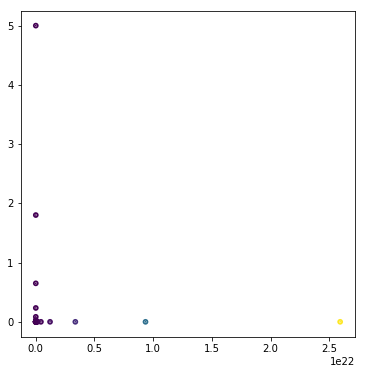

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(CC,CC2,lw=4,s=3,cmap='viridis',c=CC)
plt.show()

### Segundo punto.
En este punto consideraremos a Romeo y a Julieta como dos amantes cautelosos idénticos.

Entonces, un modelo que describe este romance es

$$\frac{dx_1}{dt} = -ax_1 + bx_2$$
$$\frac{dx_2}{dt} = bx_1 -ax_2$$
 
con  $a$  y  $b$  constantes positivas. Definimos  $x=[x_1,x_2]^T$.

Simular este sistema y obtener gráficas de  $x_1$  vs.  $t$ ,  $x_2$  vs.  $t$ y  $x_2$  vs.  $x_1$  en cada uno de los siguientes casos. Además, concluya acerca de cómo es el amor entre Romeo y Julieta cuando  $t \rightarrow \infty$.


1. (25 puntos) Para  $a=2$  y  $b=1$.

    - $x(0)=[x_1(0),x_2(0)]^T =[2,1]^T$.
    - $x(0)=[x_1(0),x_2(0)]^T =[−2,1]^T$.
    - $x(0)=[x_1(0),x_2(0)]^T =[−2,−1]^T$.
    - $x(0)=[x_1(0),x_2(0)]^T =[2,−1]^T$.
2. (25 puntos) Para  $a=1$  y  $b=2$.
    - $x(0)=[x_1(0),x_2(0)]T=[2,1]^T$.
    - $x(0)=[x_1(0),x_2(0)]T=[−2,1]^T$.
    - $x(0)=[x_1(0),x_2(0)]T=[−2,−1]^T$.
    - $x(0)=[x_1(0),x_2(0)]T=[2,−1]^T$.